# Datetime in Pandas

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# loading the data
df3 = pd.read_csv(r"C:\Users\Shubham\Desktop\PandasTutorial\precipitation_data.csv")

In [ ]:
df3

,Date,Latitude,Longitude,Precipitation
0,2023-01-01,8.786431,-14.902574,50.106317
1,2023-01-02,38.734086,80.700349,37.638916
2,2023-01-03,18.497408,-36.350884,36.491184
3,2023-01-04,8.078973,145.455981,26.090450
4,2023-01-05,-13.742136,68.409007,49.597030
...,...,...,...,...
360,2023-12-27,-56.316439,136.214098,35.422482
361,2023-12-28,72.717112,68.682519,12.027734
362,2023-12-29,7.885071,175.445553,75.490110
363,2023-12-30,-7.755944,93.341683,88.502185


In [ ]:
# Extracting query language data, remove '#' behind the ['Latitude'] to extract only latitude
df3.loc[df3['Precipitation'] == df3['Precipitation'].max()]#['Latitude']

,Date,Latitude,Longitude,Precipitation,Month,Year,Day
244,2023-09-02,39.034743,-47.546071,99.980858,9,2023,2


In [ ]:
# initially the data type of date will be 'o', but this will not let us access .pd accessor
df3['Date'].dtype

In [ ]:
#thus change the datatype to M8[ns]
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'].dtype

dtype('<M8[ns]')

In [ ]:
# sort by column
df_sorted = df3.sort_values('Precipitation')
df_sorted

,Date,Latitude,Longitude,Precipitation
91,2023-04-02,30.133868,68.316575,0.054596
340,2023-12-07,-23.246496,-143.994938,0.066422
27,2023-01-28,80.040405,-86.873736,0.138335
12,2023-01-13,12.248021,165.299977,0.386035
122,2023-05-03,82.095054,142.338918,0.515296
...,...,...,...,...
64,2023-03-06,-54.615175,-76.176541,97.588387
182,2023-07-02,13.901146,112.924314,98.048566
36,2023-02-06,20.177230,154.544910,99.189033
298,2023-10-26,85.125508,-82.349252,99.581529


In [ ]:
# i am introducing new column with month information using .dt accessor
df3['Month'] = df3['Date'].dt.month

In [ ]:
# similarily you can introduce year column
df3['Year'] = df3['Date'].dt.year

In [ ]:
# also day column
df3['Day'] = df3['Date'].dt.day

In [ ]:
df3

,Date,Latitude,Longitude,Precipitation,Month,Year,Day
0,2023-01-01,8.786431,-14.902574,50.106317,1,2023,1
1,2023-01-02,38.734086,80.700349,37.638916,1,2023,2
2,2023-01-03,18.497408,-36.350884,36.491184,1,2023,3
3,2023-01-04,8.078973,145.455981,26.090450,1,2023,4
4,2023-01-05,-13.742136,68.409007,49.597030,1,2023,5
...,...,...,...,...,...,...,...
360,2023-12-27,-56.316439,136.214098,35.422482,12,2023,27
361,2023-12-28,72.717112,68.682519,12.027734,12,2023,28
362,2023-12-29,7.885071,175.445553,75.490110,12,2023,29
363,2023-12-30,-7.755944,93.341683,88.502185,12,2023,30


In [ ]:
# group by object, first group then mean to get monthly mean data
df_grouped = df3.groupby(df3['Month'])['Precipitation'].mean()

In [ ]:
df_grouped

Month
1     45.076676
2     52.038625
3     49.017008
4     48.023343
5     54.204639
6     51.824179
7     47.348015
8     48.571038
9     52.950869
10    50.397112
11    43.500193
12    49.628327
Name: Precipitation, dtype: float64

In [ ]:
# we can specify the indexing in dataframe, by default it is 0 to n

In [ ]:
# Generate random dates
date_rng = pd.date_range(start='2023-01-01', end='2024-03-31', freq='3H')

# Generate random data
np.random.seed(0)
data = {
    'precipitation': np.random.uniform(0, 100, size=(len(date_rng))),
}

# Create a pandas DataFrame, pay attention to indexing by dates
df4 = pd.DataFrame(data, index=date_rng)
print(df4.tail(10))

                     precipitation
2024-03-29 21:00:00      22.148054
2024-03-30 00:00:00      70.468203
2024-03-30 03:00:00      15.214085
2024-03-30 06:00:00      57.675078
2024-03-30 09:00:00      21.315647
2024-03-30 12:00:00      44.923428
2024-03-30 15:00:00      86.742306
2024-03-30 18:00:00      30.259643
2024-03-30 21:00:00      68.597239
2024-03-31 00:00:00      43.828123


In [ ]:
# creating a daterange
dates = pd.date_range(start='2023-01-01', periods=10)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# indexing by date
data = {
    'Value': range(10)
}
df_date = pd.DataFrame(data, index=dates)
df_date

,Value
2023-01-01,0
2023-01-02,1
2023-01-03,2
2023-01-04,3
2023-01-05,4
2023-01-06,5
2023-01-07,6
2023-01-08,7
2023-01-09,8
2023-01-10,9


In [ ]:
# if check the time information in date, by default it is 00:00:00 since it is a daily frequency, i.e. 1 value per day
df3['Date'].dt.time

0      00:00:00
1      00:00:00
2      00:00:00
3      00:00:00
4      00:00:00
         ...   
360    00:00:00
361    00:00:00
362    00:00:00
363    00:00:00
364    00:00:00
Name: Date, Length: 365, dtype: object

In [ ]:
# conditional extraction of data
df3[df3['Month'] == 3][3:10]

,Date,Latitude,Longitude,Precipitation,Month,Year,Day
62,2023-03-04,28.139326,-156.490485,59.643307,3,2023,4
63,2023-03-05,-65.127069,101.964398,11.752564,3,2023,5
64,2023-03-06,-54.615175,-76.176541,97.588387,3,2023,6
65,2023-03-07,-23.629469,-93.089297,93.256120,3,2023,7
66,2023-03-08,57.778781,58.501646,39.179694,3,2023,8
67,2023-03-09,-72.521770,-91.417253,24.217859,3,2023,9
68,2023-03-10,60.830083,59.709282,25.039821,3,2023,10


# hourly frequency

In [ ]:
# Generate random dates, here i set frequency to 3 hourly, by default it is daily frequency
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='3H')

# Generate random data
np.random.seed(0)
data = {
    'precipitation': np.random.uniform(0, 100, size=(len(date_rng))),
}

# Create a pandas DataFrame, index by date_rng
df4 = pd.DataFrame(data, index=date_rng)
print(df4.head(10))

                     precipitation
2023-01-01 00:00:00      54.881350
2023-01-01 03:00:00      71.518937
2023-01-01 06:00:00      60.276338
2023-01-01 09:00:00      54.488318
2023-01-01 12:00:00      42.365480
2023-01-01 15:00:00      64.589411
2023-01-01 18:00:00      43.758721
2023-01-01 21:00:00      89.177300
2023-01-02 00:00:00      96.366276
2023-01-02 03:00:00      38.344152


In [ ]:
# since indexing is done by dates, we can directly access the data by dates
df4['2023-05-01':'2023-10-01']

,precipitation
2023-05-01 00:00:00,22.010386
2023-05-01 03:00:00,62.289403
2023-05-01 06:00:00,11.149606
2023-05-01 09:00:00,45.896986
2023-05-01 12:00:00,32.233354
...,...
2023-10-01 09:00:00,11.458817
2023-10-01 12:00:00,54.022280
2023-10-01 15:00:00,63.190415
2023-10-01 18:00:00,95.591231


In [ ]:
# aggregation and dissaggregation, downsampling or upsampling the frequency, we will use .resample command
df4_6h = df4.resample('6H').sum() # conversion of 3 hourly frequency to 6 hourly frequency by summing the values
df4_6h

,precipitation
2023-01-01 00:00:00,126.400287
2023-01-01 06:00:00,114.764656
2023-01-01 12:00:00,106.954891
2023-01-01 18:00:00,132.936021
2023-01-02 00:00:00,134.710428
...,...
2023-12-30 00:00:00,106.837264
2023-12-30 06:00:00,128.039550
2023-12-30 12:00:00,90.248474
2023-12-30 18:00:00,36.424874


In [ ]:
# disaggregation, upsampling, .asfreq() will fill the NaN values in the newly generated time steps
upsampled = df4.resample('1H').asfreq()

In [ ]:
upsampled

,precipitation
2023-01-01 00:00:00,54.881350
2023-01-01 01:00:00,NaN
2023-01-01 02:00:00,NaN
2023-01-01 03:00:00,71.518937
2023-01-01 04:00:00,NaN
...,...
2023-12-30 20:00:00,NaN
2023-12-30 21:00:00,24.779646
2023-12-30 22:00:00,NaN
2023-12-30 23:00:00,NaN


In [ ]:
# filling NaN
# forward fill will fill the predecessor value in all the missing time steps, you can also use .bfill to do backward fill
df_1h_ffill = upsampled.ffill()
df_1h_ffill

,precipitation
2023-01-01 00:00:00,54.881350
2023-01-01 01:00:00,54.881350
2023-01-01 02:00:00,54.881350
2023-01-01 03:00:00,71.518937
2023-01-01 04:00:00,71.518937
...,...
2023-12-30 20:00:00,11.645228
2023-12-30 21:00:00,24.779646
2023-12-30 22:00:00,24.779646
2023-12-30 23:00:00,24.779646


In [ ]:
#interpolation, we can also use interpolation to fill the NaN by avergaing the neighbours
df_1h_interpolated = upsampled.interpolate()
df_1h_interpolated

,precipitation
2023-01-01 00:00:00,54.881350
2023-01-01 01:00:00,60.427212
2023-01-01 02:00:00,65.973075
2023-01-01 03:00:00,71.518937
2023-01-01 04:00:00,67.771404
...,...
2023-12-30 20:00:00,20.401506
2023-12-30 21:00:00,24.779646
2023-12-30 22:00:00,41.262149
2023-12-30 23:00:00,57.744653


# Handling multiple files

In [ ]:
# Step 1: Generate Station Details DataFrame
stations = {
    'Station_ID': [f'Station_{i}' for i in range(1, 26)],
    'Latitude': np.random.uniform(low=-90.0, high=90.0, size=25),
    'Longitude': np.random.uniform(low=-180.0, high=180.0, size=25),
    'Type': np.random.choice(['Automatic', 'Manual'], size=25)
}
stations_df = pd.DataFrame(stations)

# Exporting station details to CSV
stations_df.to_csv('C:/Users/Shubham/Desktop/PandasTutorial/station_details.csv', index=False)
print("Stations DataFrame exported to 'C:/Users/Shubham/Desktop/PandasTutorial/station_details.csv'")

Stations DataFrame exported to 'C:/Users/Shubham/Desktop/PandasTutorial/station_details.csv'


In [ ]:
stations_df

,Station_ID,Latitude,Longitude,Type
0,Station_1,-85.858642,93.433071,Automatic
1,Station_2,-65.900201,-2.548170,Manual
2,Station_3,-85.462170,-106.244031,Automatic
3,Station_4,64.329850,111.601390,Manual
4,Station_5,21.118469,24.415436,Automatic
5,Station_6,-59.412841,-129.778130,Manual
6,Station_7,48.379000,109.761850,Manual
7,Station_8,84.024108,165.090928,Automatic
8,Station_9,78.220867,-55.381006,Manual
9,Station_10,75.878559,-74.335589,Manual


In [ ]:
# Step 2: Select 5 Stations and Generate Precipitation Data
selected_stations = stations_df['Station_ID'].sample(5, random_state=0)
dates = pd.date_range(start='1/1/2023', periods=30)

precipitation_data = {}
for station in selected_stations:
    precipitation_data[station] = pd.DataFrame({
        'Date': dates,
        'Precipitation': np.random.uniform(low=0.0, high=100.0, size=30)
    })

# Exporting precipitation data to Excel with multiple sheets
with pd.ExcelWriter('C:/Users/Shubham/Desktop/PandasTutorial/precipitation_data.xlsx') as writer:
    for station, data in precipitation_data.items():
        data.to_excel(writer, sheet_name=station, index=False)
print("Precipitation data exported to 'C:/Users/Shubham/Desktop/PandasTutorial/precipitation_data.xlsx'")

Precipitation data exported to 'C:/Users/Shubham/Desktop/PandasTutorial/precipitation_data.xlsx'


In [ ]:
# Step 3: Merge Station Details with Precipitation Data
combined_data = []
for station, data in precipitation_data.items():
    station_details = stations_df[stations_df['Station_ID'] == station]
    station_details = station_details.reset_index(drop=True)
    data['Station_ID'] = station
    merged_data = data.merge(station_details, on='Station_ID')
    combined_data.append(merged_data)

all_data = pd.concat(combined_data)

In [ ]:
all_data

,Date,Precipitation,Station_ID,Latitude,Longitude,Type
0,2023-01-01,82.148645,Station_6,-59.412841,-129.778130,Manual
1,2023-01-02,37.587695,Station_6,-59.412841,-129.778130,Manual
2,2023-01-03,60.793680,Station_6,-59.412841,-129.778130,Manual
3,2023-01-04,11.507741,Station_6,-59.412841,-129.778130,Manual
4,2023-01-05,76.650077,Station_6,-59.412841,-129.778130,Manual
...,...,...,...,...,...,...
25,2023-01-26,19.594610,Station_12,16.022428,59.216842,Automatic
26,2023-01-27,16.297689,Station_12,16.022428,59.216842,Automatic
27,2023-01-28,32.983626,Station_12,16.022428,59.216842,Automatic
28,2023-01-29,79.151649,Station_12,16.022428,59.216842,Automatic


In [ ]:
# Exporting merged data to CSV
all_data.to_csv('C:/Users/Shubham/Desktop/PandasTutorial/merged_data.csv', index=False)
print("All combined data exported to 'C:/Users/Shubham/Desktop/PandasTutorial/merged_data.csv'")

All combined data exported to 'C:/Users/Shubham/Desktop/PandasTutorial/merged_data.csv'


# GeoPandas

In [ ]:
# Generate random dates
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Generate random data
np.random.seed(0)
data = {
    'date': date_rng,
    'precipitation': np.random.uniform(0, 100, size=(len(date_rng))),
    'latitude': np.random.uniform(-90, 90, size=(len(date_rng))),
    'longitude': np.random.uniform(-180, 180, size=(len(date_rng)))
}

# Create a pandas DataFrame
df5 = pd.DataFrame(data)
print(df5.head())

        date  precipitation   latitude  longitude
0 2023-01-01      54.881350  -7.451287   0.382742
1 2023-01-02      71.518937  40.350175 -44.499904
2 2023-01-03      60.276338 -18.175442 -48.631739
3 2023-01-04      54.488318  72.727991 -86.074380
4 2023-01-05      42.365480  34.204504  -1.450694


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Create a GeoSeries of Points
geometry1 = [Point(xy) for xy in zip(df5['longitude'], df5['latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df5, geometry=geometry1)

# Set the Coordinate Reference System (CRS), we will set it to None for now
gdf.crs = None

print(gdf.head())

        date  precipitation   latitude  longitude                     geometry
0 2023-01-01      54.881350  -7.451287   0.382742     POINT (0.38274 -7.45129)
1 2023-01-02      71.518937  40.350175 -44.499904   POINT (-44.49990 40.35017)
2 2023-01-03      60.276338 -18.175442 -48.631739  POINT (-48.63174 -18.17544)
3 2023-01-04      54.488318  72.727991 -86.074380   POINT (-86.07438 72.72799)
4 2023-01-05      42.365480  34.204504  -1.450694    POINT (-1.45069 34.20450)


In [ ]:
gdf['latitude'].dtype, gdf['geometry'].dtype

(dtype('float64'), <geopandas.array.GeometryDtype at 0x22e7df4fd00>)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_16512\2117966344.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


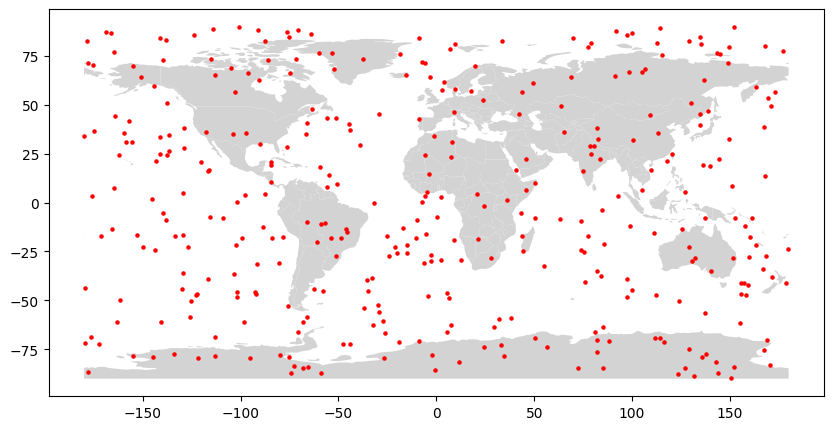

In [ ]:
import matplotlib.pyplot as plt

# Plot the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with the points
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

In [ ]:
# Select a specific country
country = world[world.name == "India"]

# Perform a spatial join to find points within the country, this spatial join is quite useful will discuss in upcoming classes
points_in_india = gpd.sjoin(gdf, country, how="inner", op='within')

points_in_india

C:\Users\Shubham\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Shubham\AppData\Local\Temp\ipykernel_16512\2847209447.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  points_in_india = gpd.sjoin(gdf, country, how="inner", op='within')


,date,precipitation,latitude,longitude,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
149,2023-05-30,99.884701,22.029197,83.427907,POINT (83.42791 22.02920),98,1.366418e+09,Asia,India,IND,2868929
216,2023-08-05,32.001715,29.001152,78.705501,POINT (78.70550 29.00115),98,1.366418e+09,Asia,India,IND,2868929
273,2023-10-01,96.157015,16.145050,75.157341,POINT (75.15734 16.14505),98,1.366418e+09,Asia,India,IND,2868929
304,2023-11-01,40.724117,25.053642,78.980062,POINT (78.98006 25.05364),98,1.366418e+09,Asia,India,IND,2868929


# Demonstration

In [ ]:
# first create all x values (lon values) using while loop, within a range e.g. 70 to 94 with a spacing (resolution) of 3 degrees (300 km)
minx = 70
max_x = 94

x_values = []

current_x = minx
increment = 3

while current_x <= max_x:
    x_values.append(current_x)
    current_x += increment

In [ ]:
# similarily create y values within a range
miny = 6
max_y = 36

y_values = []
current_y = miny
increment = 3

while current_y <= max_y:
    y_values.append(current_y)
    current_y += increment

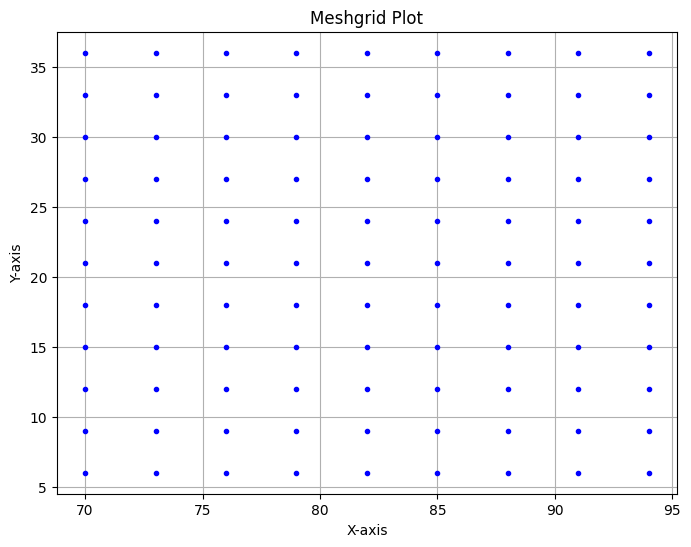

In [ ]:
# we have 41 x values and 61 y values, to create all grid points (41 * 61), we will use meshgrid in numpy
X, Y = np.meshgrid(x_values, y_values)

# plot to visualize
plt.figure(figsize=(8, 6))
plt.plot(X, Y, marker='.', color='b', linestyle='none')  # Plot grid points
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Meshgrid Plot')
plt.grid(True)
plt.show()

In [ ]:
# function to calculate grid parameters, try to understand it
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [ ]:
x_values

[70, 73, 76, 79, 82, 85, 88, 91, 94]

In [ ]:
calculate_grid_parameters(x_values)

array([68.5, 71.5, 74.5, 77.5, 80.5, 83.5, 86.5, 89.5, 92.5, 95.5])

In [ ]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]

    dy = y_values[1] - y_values[0]
    k = 0

    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)

    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [loncell[i], loncell[i], loncell[i+1], loncell[i+1], loncell[i]]
            y_coords = [latcell[j], latcell[j+1], latcell[j+1], latcell[j], latcell[j]] if dy > 0 else \
                       [latcell[j+1], latcell[j], latcell[j], latcell[j+1], latcell[j+1]]

            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': lon, 'Yc': lat}
            k += 1
    return grid_cell

In [ ]:
grid_cell = initialize_and_populate_grid(x_values, y_values)
grid_cell

[{'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [4.5, 7.5, 7.5, 4.5, 4.5],
  'Xc': 70,
  'Yc': 6},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [7.5, 10.5, 10.5, 7.5, 7.5],
  'Xc': 70,
  'Yc': 9},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [10.5, 13.5, 13.5, 10.5, 10.5],
  'Xc': 70,
  'Yc': 12},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [13.5, 16.5, 16.5, 13.5, 13.5],
  'Xc': 70,
  'Yc': 15},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [16.5, 19.5, 19.5, 16.5, 16.5],
  'Xc': 70,
  'Yc': 18},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [19.5, 22.5, 22.5, 19.5, 19.5],
  'Xc': 70,
  'Yc': 21},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [22.5, 25.5, 25.5, 22.5, 22.5],
  'Xc': 70,
  'Yc': 24},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [25.5, 28.5, 28.5, 25.5, 25.5],
  'Xc': 70,
  'Yc': 27},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [28.5, 31.5, 31.5, 28.5, 28.5],
  'Xc': 70,
  'Yc': 30},
 {'X': [68.5, 68.5, 71.5, 71.5, 68.5],
  'Y': [31.5, 34.5, 34.5, 31.5, 31.5],
  'Xc

In [ ]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=None)

grid_gdf.head()

,geometry
0,"POLYGON ((68.50000 4.50000, 68.50000 7.50000, ..."
1,"POLYGON ((68.50000 7.50000, 68.50000 10.50000,..."
2,"POLYGON ((68.50000 10.50000, 68.50000 13.50000..."
3,"POLYGON ((68.50000 13.50000, 68.50000 16.50000..."
4,"POLYGON ((68.50000 16.50000, 68.50000 19.50000..."


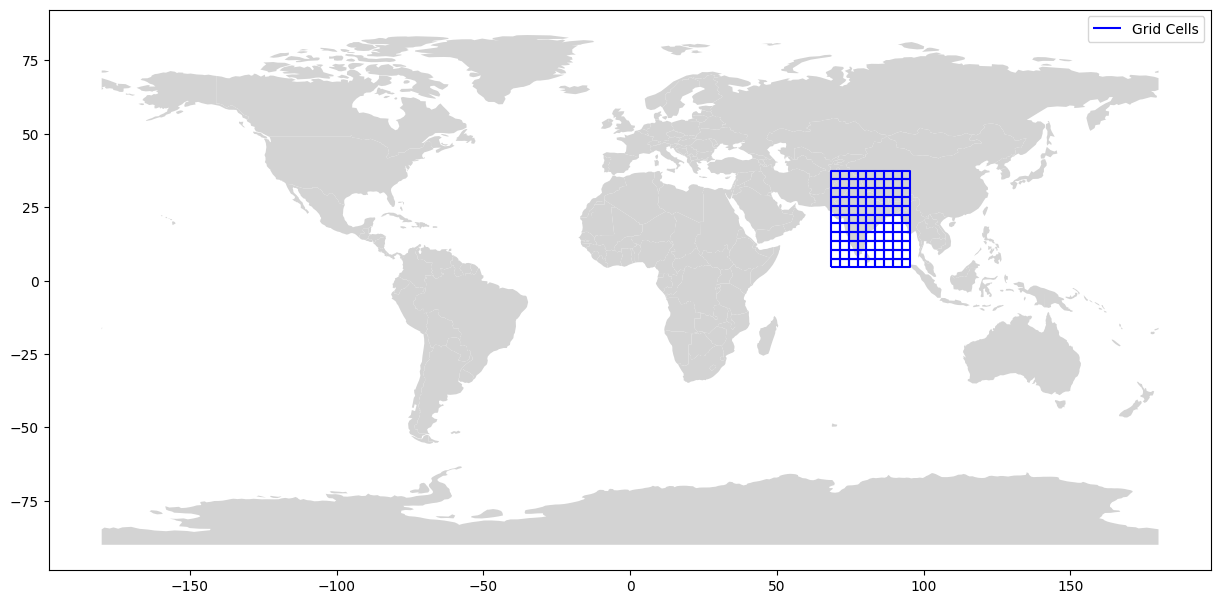

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
# Plot the world map in the background
world.plot(ax=ax, color='lightgray')
# Plot the grid gdf
grid_gdf.boundary.plot(ax=ax, color='blue', label='Grid Cells')
plt.legend()
plt.show()